In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns
from scipy import stats

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

from matplotlib.markers import TICKDOWN

In [2]:
def file_import(file_path, sheet_names):
    file_name = pd.read_excel(file_path, sheet_name = sheet_names)
    return file_name

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def pearsonr_1D(x, y):
    if (x.size != y.size):
        return None
    
    xm = x - np.mean(x)
    ym = y - np.mean(y)
    upper = np.sum(xm * ym)
    lower = np.sqrt(np.sum(np.power(xm, 2)) * np.sum(np.power(ym, 2)))
    
    if (lower == 0):
        return None
    
    rho = upper / lower
    return rho

In [3]:
# Import Data
cd105_FBS_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
cd105_FBS_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
cd105_FBS_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
cd105_FBS_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_FBS_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(cd105_FBS_pred, cd105_FBS_pred_background):
    cd105_FBS_pred[pred].Mean = cd105_FBS_pred[pred].Mean - np.mean (cd105_FBS_pred_background[background].Mean)
    cd105_FBS_pred[pred].Mean = cd105_FBS_pred[pred].Mean / np.mean (cd105_FBS_pred["P2"].Mean)

for target, background in zip(cd105_FBS_target, cd105_FBS_target_background):
    cd105_FBS_target[target].Mean = cd105_FBS_target[target].Mean - np.mean (cd105_FBS_target_background[background].Mean)
    cd105_FBS_target[target].Mean = cd105_FBS_target[target].Mean / np.mean (cd105_FBS_target["P2"].Mean)

In [4]:
for background in cd105_FBS_pred_background:
    print(np.mean (cd105_FBS_pred_background[background].Mean))
    
for background in cd105_FBS_target_background:
    print(np.mean (cd105_FBS_target_background[background].Mean))

20.7238
22.2252
23.0356
23.067500000000003
22.4923
20.7238
22.2252
23.0356
23.067500000000003
22.4923


In [5]:
# Import Data
cd105_stemfit_pred = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2", "P4", "P6", "P8", "P10"])
cd105_stemfit_target = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_target.xlsx", ["P2", "P4", "P6", "P8", "P10"])

# Import Backgrounds
cd105_stemfit_pred_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])
cd105_stemfit_target_background = file_import(r"C:\Users\Brandon\Desktop\Work\Lin_Lab\MSC\Data\220126_Replicative_Senescence\Data\211111_stemfit_cd105_prediction.xlsx", ["P2_Background", "P4_Background", "P6_Background", "P8_Background", "P10_Background"])

# Standardize Data to Background and P2
for pred, background in zip(cd105_stemfit_pred, cd105_stemfit_pred_background):
    cd105_stemfit_pred[pred].Mean = cd105_stemfit_pred[pred].Mean - np.mean (cd105_stemfit_pred_background[background].Mean)
    cd105_stemfit_pred[pred].Mean = cd105_stemfit_pred[pred].Mean / np.mean (cd105_stemfit_pred["P2"].Mean)

for target, background in zip(cd105_stemfit_target, cd105_stemfit_target_background):
    cd105_stemfit_target[target].Mean = cd105_stemfit_target[target].Mean - np.mean (cd105_stemfit_target_background[background].Mean)
    cd105_stemfit_target[target].Mean = cd105_stemfit_target[target].Mean / np.mean (cd105_stemfit_target["P2"].Mean)

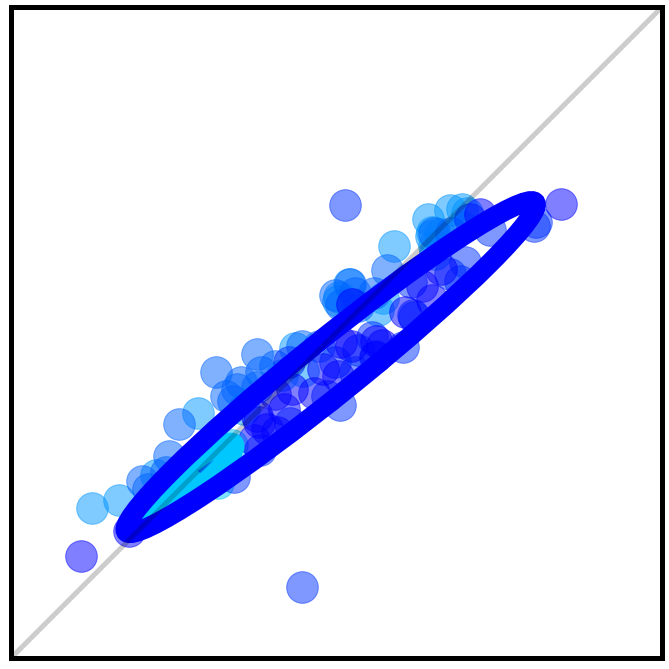

In [6]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(-0.5,5)
plt.ylim(-0.5,5)

# Plot Scatter Plots
colors = ["#00c8ff", "#0096ff", "#0064ff", "#0032ff", "#0000ff"]
for pred, target, color in zip(cd105_FBS_pred, cd105_FBS_target, colors):
    plt.scatter(cd105_FBS_target[target].Mean, cd105_FBS_pred[pred].Mean, c = color, alpha = 0.5, label = pred, s=1000)

# Plot Circles
confidence_ellipse (cd105_FBS_target['P2'].Mean, cd105_FBS_pred['P2'].Mean, ax = axs, n_std = 2.0, edgecolor = "#00c8ff", linewidth=20)
confidence_ellipse (cd105_FBS_target['P10'].Mean, cd105_FBS_pred['P10'].Mean, ax = axs, n_std = 2.0, edgecolor = "#0000ff", linewidth=20)

# Plot Titles
# plt.title ("cd105")
# plt.xlabel ("Target Intensity")
# plt.ylabel ("Prediction Intensity")
# plt.legend()

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

# plt.legend(frameon=False, loc='upper center', ncol = 5, fontsize = 'x-small', labelspacing = 0, handlelength = 1.5, handletextpad = 0, borderpad = 0, columnspacing = 0)

plt.tight_layout()
plt.plot(figsize=(300, 150), dpi=100)
plt.savefig(fname="cd105_FBS")

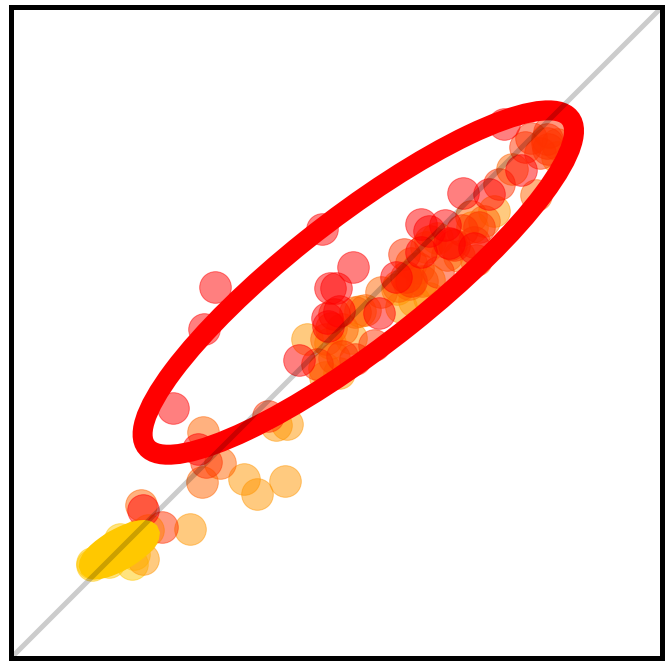

In [7]:
fig, axs = plt.subplots(figsize = [10,10])
axs.spines["top"].set_linewidth(5)
axs.spines["left"].set_linewidth(5)
axs.spines["right"].set_linewidth(5)
axs.spines["bottom"].set_linewidth(5)

plt.xlim(0,6)
plt.ylim(0,6)

# Plot Scatter Plots
colors = ["#ffc800", "#ff9600", "#ff6400", "#ff3200", "#ff0000"]
for pred, target, color in zip(cd105_stemfit_pred, cd105_stemfit_target, colors):
    plt.scatter(cd105_stemfit_target[target].Mean, cd105_stemfit_pred[pred].Mean, c = color, alpha = 0.5, label = pred, s=1000)

# Plot Circles
confidence_ellipse (cd105_stemfit_target['P2'].Mean, cd105_stemfit_pred['P2'].Mean, ax = axs, n_std = 2.0, edgecolor = "#ffc800", linewidth=20)
confidence_ellipse (cd105_stemfit_target['P10'].Mean, cd105_stemfit_pred['P10'].Mean, ax = axs, n_std = 2.0, edgecolor = "#ff0000", linewidth=20)

# Plot Titles
# plt.title ("CD105")
# plt.xlabel ("Target Intensity")
# plt.ylabel ("Prediction Intensity")
# plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))

# Plot f(x) = x
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot (x, x, c = 'black', alpha = 0.2, linewidth = 5)

axs.axes.xaxis.set_visible(False)
axs.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.plot(figsize=(300, 150), dpi=100)
plt.savefig(fname="cd105_stemfit")

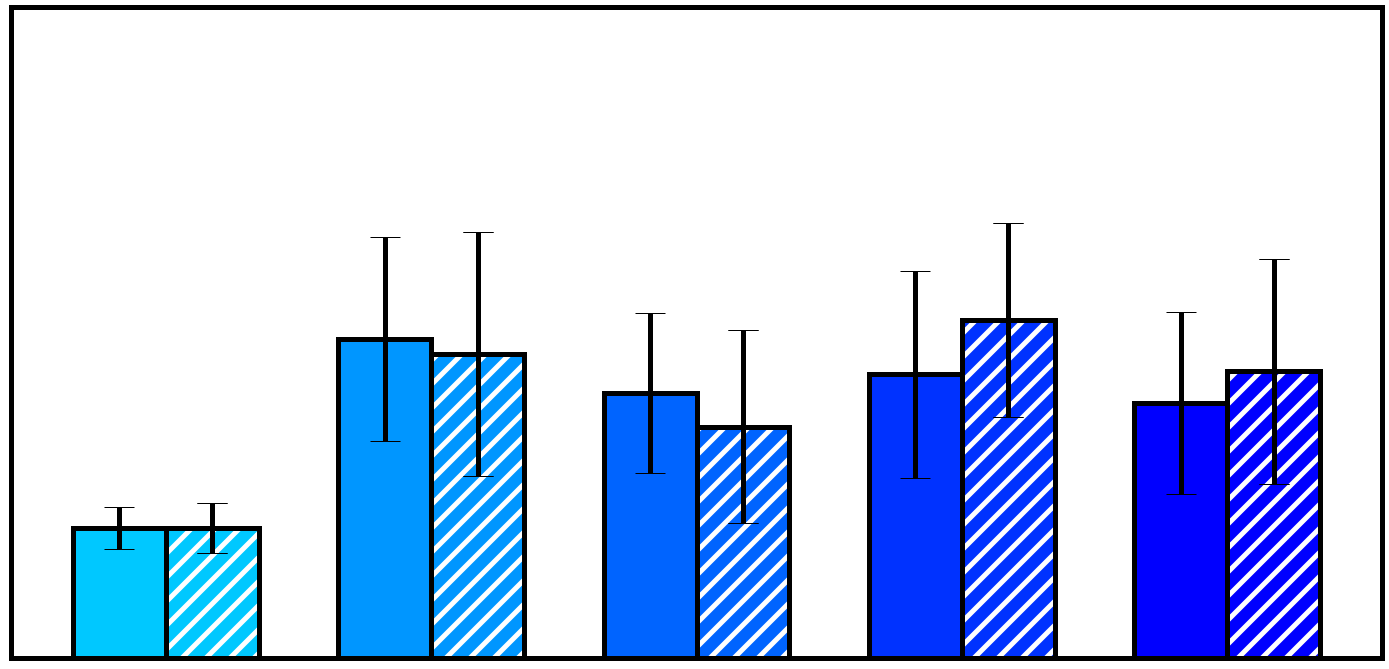

In [8]:
# Constants
indexes = np.arange(len(cd105_FBS_pred))
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [20,10])

plt.ylim(0,5)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5


# Plot Barplot
colors = ["#00c8ff", "#0096ff", "#0064ff", "#0032ff", "#0000ff"]
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 15)
for pred, target, index, color in zip(cd105_FBS_pred, cd105_FBS_target, indexes, colors):
    ax.bar(index, cd105_FBS_pred[pred].Mean.mean(), bar_width, yerr = cd105_FBS_pred[pred].Mean.std(), error_kw = error_config, color = color, edgecolor = "black", linewidth = 5)
    ax.bar(index + bar_width, cd105_FBS_target[target].Mean.mean(), bar_width, yerr = cd105_FBS_target[target].Mean.std(), error_kw = error_config, color = color, hatch = "/", edgecolor = "white", linewidth = 5)
    ax.bar(index + bar_width, cd105_FBS_target[target].Mean.mean(), bar_width, yerr = cd105_FBS_target[target].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("cd105")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
ax.set_xticklabels(cd105_FBS_pred)

# prediction_label = mpatches.Patch(facecolor='#0000ff', label='Prediction')
# target_label = mpatches.Patch(facecolor='#0000ff', hatch = "/", label='Target')
# plt.legend(handles=[prediction_label, target_label], frameon=False, loc='upper left', fontsize = 'small', borderpad = 0)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(fname="cd105_FBS_Bar")

In [9]:
stats.ttest_ind (cd105_FBS_pred["P2"].Mean, cd105_FBS_pred["P10"].Mean)

Ttest_indResult(statistic=-6.664869204773387, pvalue=2.401919670264879e-08)

In [10]:
stats.ttest_ind (cd105_FBS_target["P2"].Mean, cd105_FBS_target["P10"].Mean)

Ttest_indResult(statistic=-6.76425590366261, pvalue=1.6906212508593592e-08)

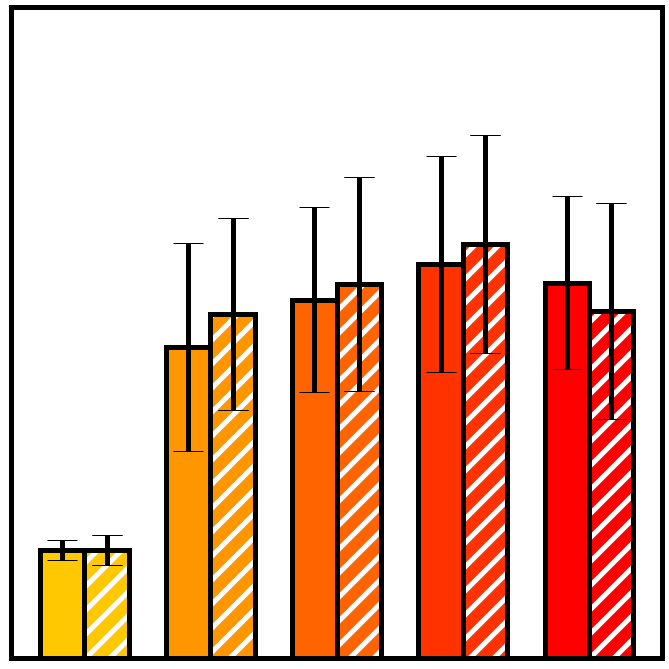

In [14]:
# Constants
indexes = np.arange(len(cd105_stemfit_pred))
bar_width = 0.35

# Create Subplot
fix, ax = plt.subplots(figsize = [10,10])

plt.ylim(0,6)

ax.spines["top"].set_linewidth(5)
ax.spines["left"].set_linewidth(5)
ax.spines["right"].set_linewidth(5)
ax.spines["bottom"].set_linewidth(5)

plt.rcParams['hatch.linewidth'] = 5

# Plot Barplot
colors = ["#ffc800", "#ff9600", "#ff6400", "#ff3200", "#ff0000"]
error_config = dict(elinewidth = 5, ecolor = '0', capsize = 15)
for pred, target, index, color in zip(cd105_stemfit_pred, cd105_stemfit_target, indexes, colors):
    ax.bar(index, cd105_stemfit_pred[pred].Mean.mean(), bar_width, yerr = cd105_stemfit_pred[pred].Mean.std(), error_kw = error_config, color = color, edgecolor = "black", linewidth = 5)
    ax.bar(index + bar_width, cd105_stemfit_target[target].Mean.mean(), bar_width, yerr = cd105_stemfit_target[target].Mean.std(), error_kw = error_config, color = color, hatch = "/", edgecolor = "white", linewidth = 5)
    ax.bar(index + bar_width, cd105_stemfit_target[target].Mean.mean(), bar_width, yerr = cd105_stemfit_target[target].Mean.std(), error_kw = error_config, color = "none", edgecolor = "black", linewidth = 5)

# Plot Titles
# ax.set_title("CD105")
# ax.set_ylabel("Mean Intensity")
ax.set_xticks(indexes + bar_width / 2)
ax.set_xticklabels(cd105_stemfit_pred)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(fname="cd105_stemfit_Bar")

In [12]:
stats.ttest_ind (cd105_stemfit_pred["P2"].Mean, cd105_stemfit_pred["P10"].Mean)

Ttest_indResult(statistic=-15.414198623785468, pvalue=3.228190401753813e-20)

In [13]:
stats.ttest_ind (cd105_stemfit_target["P2"].Mean, cd105_stemfit_target["P10"].Mean)

Ttest_indResult(statistic=-10.971012479763306, pvalue=1.117884703807329e-14)